In [39]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import matplotlib.pyplot as plt
import numpy as np
from amortizer_classification import amortizer, model, configurator_mixture
from scipy.io import loadmat


In [5]:
df = configurator_mixture(model(1))

In [12]:
forward, backward, smoothing = amortizer.sample(df)

In [7]:
df['summary_conditions'].shape

(1, 2500, 3)

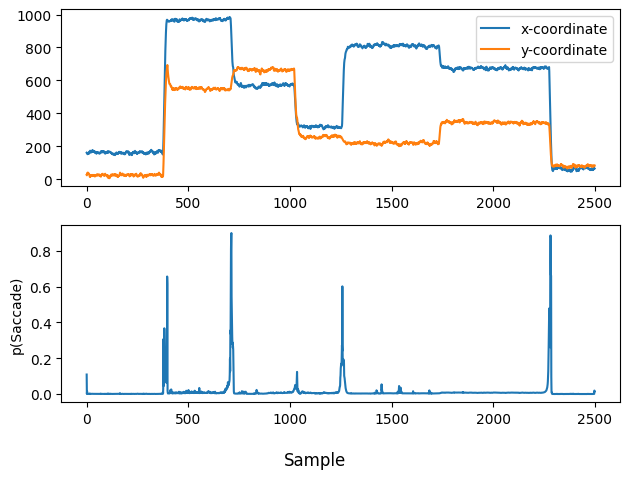

In [25]:
fig, axs = plt.subplots(nrows=2)
axs = axs.flatten()

axs[0].plot(df['summary_conditions'][0,:,0], label="x-coordinate")
axs[0].plot(df['summary_conditions'][0,:,1], label="y-coordinate")
axs[0].legend()

axs[1].plot(smoothing[0,0,:,1], label="Smoothing")
axs[1].set(ylabel="p(Saccade)")

fig.supxlabel('Sample')
fig.tight_layout()

In [13]:
smoothing.shape

TensorShape([1, 1, 2500, 2])

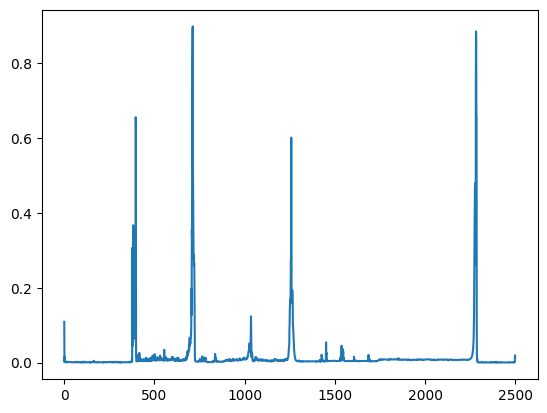

In [17]:
#plt.plot(forward[0,0,:,1])
#plt.plot(backward[0,0,:,1])
plt.plot(smoothing[0,0,:,1])

In [27]:
dat=loadmat("TH34_img_Europe_labelled_MN.mat")

In [63]:
position, screenDim, screenRes, viewDist, sampFreq = dat['ETdata'][0,0]
position = position[:2500, 3:5]
position = np.expand_dims(position, axis=0)
batch_size, num_timesteps, data_dim = position.shape
time_encoding = np.linspace(0, 1, num_timesteps)
time_encoding_batched = np.tile(time_encoding[np.newaxis, :, np.newaxis], (batch_size, 1, 1))
position = np.concatenate((position, time_encoding_batched), axis=-1).astype(np.float32)
position.shape


(1, 2500, 3)

In [64]:
forward, backward, smoothing = amortizer.sample(dict(summary_conditions = position))

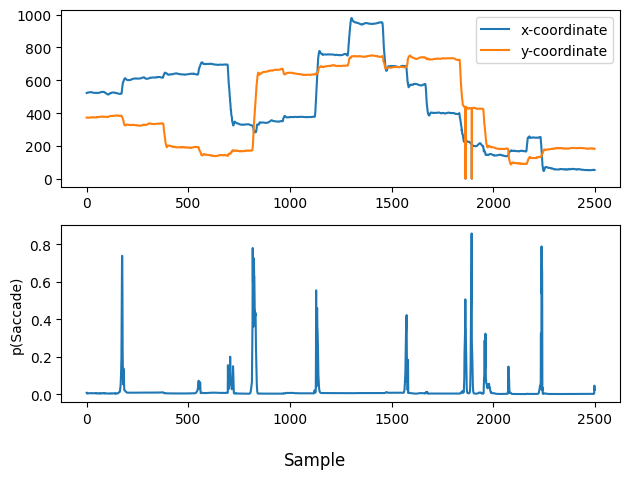

In [65]:
fig, axs = plt.subplots(nrows=2)
axs = axs.flatten()

axs[0].plot(position[0,:,0], label="x-coordinate")
axs[0].plot(position[0,:,1], label="y-coordinate")
axs[0].legend()

axs[1].plot(smoothing[0,0,:,1], label="Smoothing")
axs[1].set(ylabel="p(Saccade)")

fig.supxlabel('Sample')
fig.tight_layout()